<a href="https://colab.research.google.com/github/Indukurivigneshvarma/Deep_Learning/blob/main/Time_Series/Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn statsmodels --quiet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Column names before fix: ['Date', 'Temp']
Column names after fix: ['Date', 'Temp']

✅ Index successfully set to Date. Preview:
            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


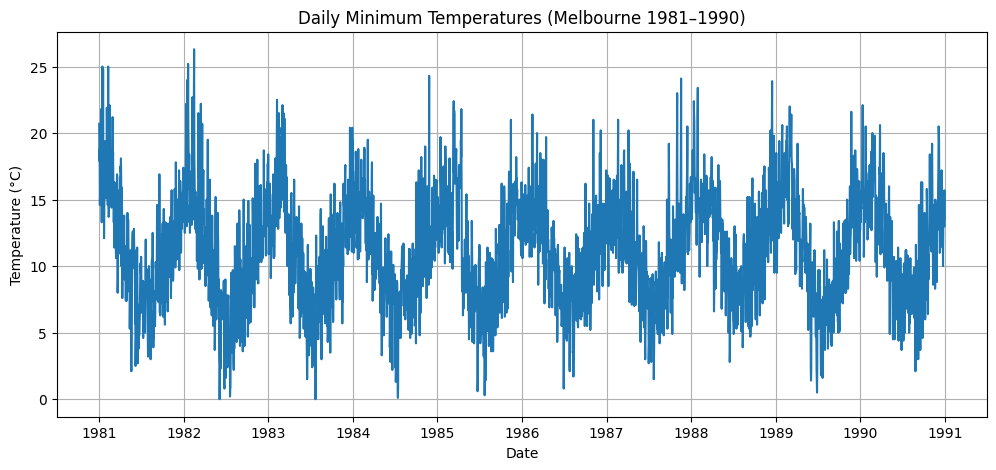

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)

print("Column names before fix:", df.columns.tolist())

df.columns = df.columns.str.strip().str.capitalize()
print("Column names after fix:", df.columns.tolist())

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df = df.dropna(subset=['Date'])

df.set_index('Date', inplace=True)
df = df.asfreq('D')

print("\n✅ Index successfully set to Date. Preview:")
print(df.head())
plt.figure(figsize=(12,5))
plt.plot(df['Temp'])
plt.title("Daily Minimum Temperatures (Melbourne 1981–1990)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

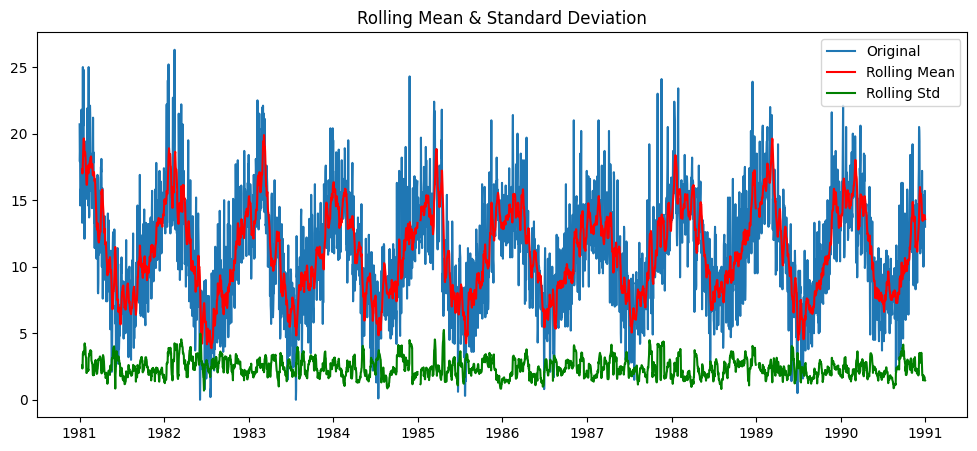

In [ ]:
rolling_mean = df['Temp'].rolling(window=12).mean()
rolling_std = df['Temp'].rolling(window=12).std()

plt.figure(figsize=(12,5))
plt.plot(df['Temp'], label='Original', color='tab:blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='green')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [ ]:
def adf_test(series):
    print("\n--- Augmented Dickey-Fuller Test ---")
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out)
    if result[1] <= 0.05:
        print("\n✅ Strong evidence against the null hypothesis → Series is Stationary.")
    else:
        print("\n❌ Weak evidence against the null hypothesis → Series is Non-Stationary.")
    return result

adf_result = adf_test(df['Temp'])


--- Augmented Dickey-Fuller Test ---
ADF Statistic                    -4.444805
p-value                           0.000247
#Lags Used                       20.000000
Number of Observations Used    3629.000000
Critical Value (1%)              -3.432153
Critical Value (5%)              -2.862337
Critical Value (10%)             -2.567194
dtype: float64

✅ Strong evidence against the null hypothesis → Series is Stationary.


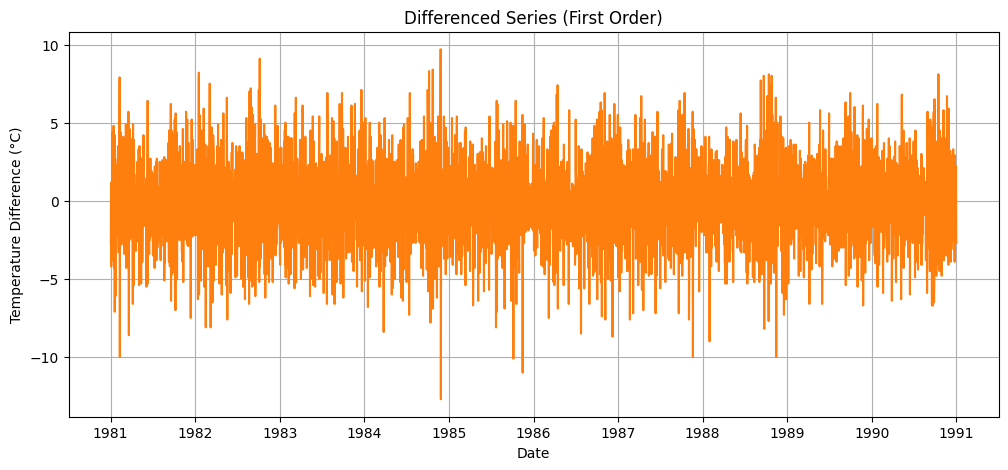


Performing ADF test after differencing:

--- Augmented Dickey-Fuller Test ---
ADF Statistic                 -1.795416e+01
p-value                        2.831750e-30
#Lags Used                     2.400000e+01
Number of Observations Used    3.622000e+03
Critical Value (1%)           -3.432157e+00
Critical Value (5%)           -2.862338e+00
Critical Value (10%)          -2.567195e+00
dtype: float64

✅ Strong evidence against the null hypothesis → Series is Stationary.


In [ ]:
df_diff = df['Temp'].diff().dropna()

plt.figure(figsize=(12,5))
plt.plot(df_diff, color='tab:orange')
plt.title("Differenced Series (First Order)")
plt.xlabel("Date")
plt.ylabel("Temperature Difference (°C)")
plt.grid(True)
plt.show()

print("\nPerforming ADF test after differencing:")
adf_result_diff = adf_test(df_diff)

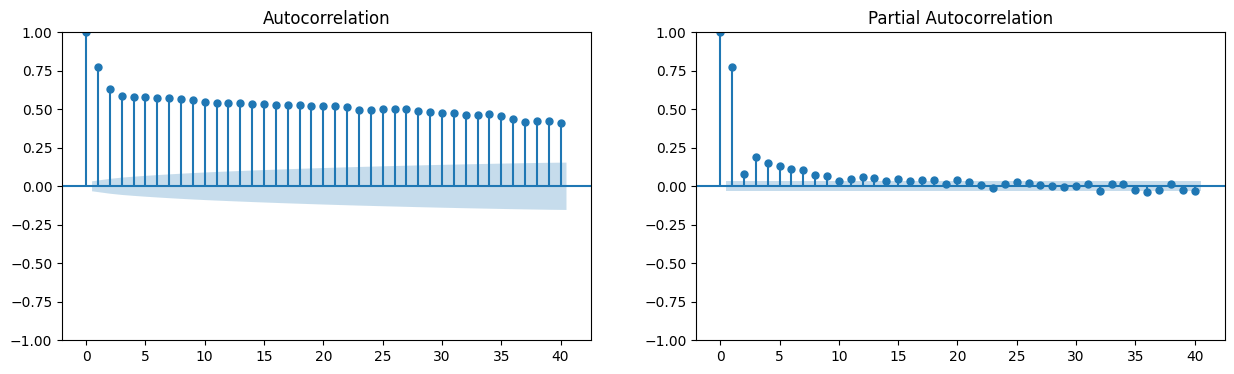


✅ All basic analyses complete!


In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
plot_acf(df['Temp'].dropna(), lags=40, ax=ax[0])
plot_pacf(df['Temp'].dropna(), lags=40, ax=ax[1])
plt.show()

print("\n✅ All basic analyses complete!")